# Esame di Metodi Numerici del 12 Giugno 2025

## Turno I ore 9

## Esercizio 1

Si condiderino i due sistemi lineari:

     A  x = b 

    A1 x1 = b1

dove A, A1 sono le matrici dei coefficienti, b e b1 sono i termini noti, ed x ed x1 sono i vettori incongiti da determinare.
I dati di questi due sistemi lineari sono contenuti nel file **testI.mat**.


- Si implementino almeno due metodi che sono adatti a risolvere sistemi lineari con le caratteristiche delle matrici dei coefficienti date in input.
                                      **punti 6**
- Sperimentazione:

    -  Per ognuno dei due sistemi lineari, usare tutti i metodi per calcolarne la soluzione e confrontarne su grafico l'andamento dell'errore ad ogni iterazione ed il numero di iterazioni. 

    - Per ogni metodo implementato, verificare come esso si comporta al variare delle matrici, confrontarne su grafico l'andamento dell'errore ad ogni iterazione, per spiegare come l'indice di condizionamento influenza la velocità di convergenza e giustificare i risulati alla luce della teoria.
                                      **punti 4**

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testI')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``

``A1=dati["A1"] ``

``A1=A1.astype(float)``

`` b1=dati["b1"] ``

`` b1=b1.astype(float)``


In [22]:
from scipy.io import loadmat
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [19]:
dati = loadmat('test1')
A=dati["A"] 
A=A.astype(float)
b=dati["b"]
b=b.astype(float)

A1=dati["A1"] 
A1=A1.astype(float)
b1=dati["b1"]
b1=b1.astype(float)

matrices = [
    A, A1
]

bs = [
    b.reshape(A.shape[1]), b1.reshape(A1.shape[1])
]

# Metodi di utilities per analizzare le caratteristiche delle due matrici
def is_square(A):
    return A.shape[0] == A.shape[1]

def is_sparse(A):
    return np.count_nonzero(A) / A.size < .33

def is_def_pos(A):
    def is_symm(A):
        return np.allclose(A, A.T, atol=np.spacing(1))
    return is_symm(A) and np.all(np.linalg.eigvals(A) > 0)

def is_dd(A):
    d = np.diag(np.abs(A))
    row_sum = np.sum(np.abs(A), axis=0)
    return np.all(d > row_sum - d)

def has_max_rank(A):
    return np.linalg.matrix_rank(A) == A.shape[1]

for idx, A in enumerate(matrices):
    print(f"=== Caratteristiche della matrice A{" " if idx == 0 else "1"} ===")
    print("Dimensioni ('m' righe, 'n' colonne)", A.shape)
    print("Matrice quadrata?", is_square(A))
    print("Matrice sparsa?", is_sparse(A))
    if is_square(A):
        print("Matrice simmetrica e definita positiva?", is_def_pos(A))
        print("Matrice a diagonale strettamente dominante?", is_dd(A))
    else:
        # Per sistemi lineari sovradeterminati
        print("Matrice a rango massimo?", has_max_rank(A))
    print("Condizionamento", np.linalg.cond(A))
    print()

=== Caratteristiche della matrice A  ===
Dimensioni ('m' righe, 'n' colonne) (600, 600)
Matrice quadrata? True
Matrice sparsa? True
Matrice simmetrica e definita positiva? True
Matrice a diagonale strettamente dominante? False
Condizionamento 9.999999999999691

=== Caratteristiche della matrice A1 ===
Dimensioni ('m' righe, 'n' colonne) (600, 600)
Matrice quadrata? True
Matrice sparsa? True
Matrice simmetrica e definita positiva? True
Matrice a diagonale strettamente dominante? False
Condizionamento 1000.0000000000069



#### Osservazioni

Entrambe le matrici presentano caratteristiche simili: sono quadrate, grandi e sparse - e per questo motivo i metodi iterativi per la risoluzione di sistemi lineari si prestano al contesto.

Entrambe sono simmetriche e definite positive, e nessuna delle due è a diagonale strettamente dominante. Per cui i metodi di discesa come Steepest Descent e Conjugate Gradient oppure il metodo di Gauss Seidel garantiscono la convergenza ad un risultato. Scelgo di implementare **Gauss-Seidel** e **Steepest-Descent**.

N.B.: $A$ è ben condizionata, $A1$ e mediamente malcondizionata (tendente al ben condizionata)

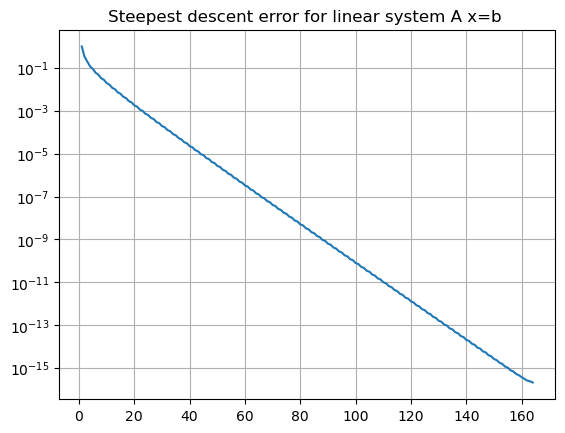

Result: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

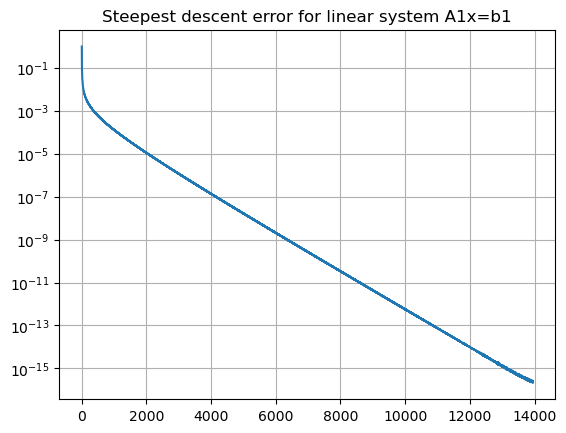

Result: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

In [42]:
def steepest_descent(A, b, x0, maxit, toll=np.spacing(1)):
    x_curr = x0.copy()
    attempts = [ x_curr.copy() ]
    errors = [ np.inf ]
    while len(attempts) < maxit:
        # Vettore gradiente
        r_k = A @ x_curr - b
        # Direzione da intraprendere (opposta del vettore gradiente)
        p_k = -r_k
        # Step size
        alpha_k = (r_k @ r_k) / ((A @ r_k) @ r_k)
        
        # Aggiorno l'iterato
        # 'Compio' un passo grande quanto 'alpha_k' nella direzione di decrescita 'p_k' 
        x_curr += alpha_k * p_k
        attempts.append(x_curr)
        
        error = np.linalg.norm(r_k) / np.linalg.norm(b)
        errors.append(error)
        if np.abs(error) < toll:
            break
            
    return attempts[-1], len(attempts), errors

idx = 0
for A, b in zip(matrices, bs):
    x0 = np.zeros(A.shape[1])
    maxit = 20_000
    steep_res, steep_att, steep_err = steepest_descent(A, b, x0, maxit)
    plt.semilogy(range(steep_att), steep_err)
    plt.grid(True)
    plt.title(f"Steepest descent error for linear system A{" " if idx == 0 else "1"}x=b{" " if idx == 0 else "1"}")
    plt.show()
    print("Result:", steep_res)
    print(f"Iterazioni {steep_att}/{maxit}")
    idx += 1

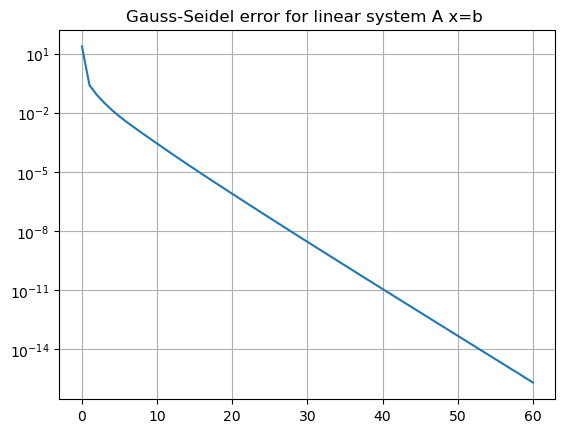

Result: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

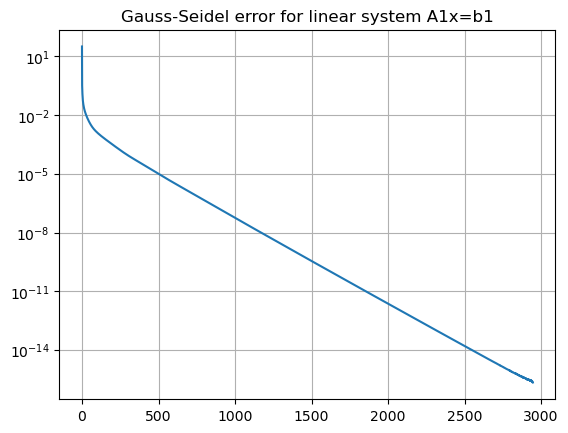

Result: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

In [146]:
def gauss_seidel(A, b, x0, maxit, toll=np.spacing(1)):
    d = np.diag(A)
    # Diagonal matrix
    D = np.diag(d)
    # Lower triangle matrix (with null diagonal)
    L = np.tril(A, -1)
    # Upper triangle matrix (with null diagonal)
    U = np.triu(A, 1)

    # Nei metodi iterativi, A viene scomposta come differenza di due matrici A = M - N
    # Con Gauss-Seidel (e anche Jacobi), otteniamo A = D + L + U (precedentemente definite e spiegate)
    M = L + D
    N = -U

    T = np.linalg.inv(M) @ N
    q = np.linalg.inv(M) @ b
    
    x_next, x_curr = None, x0.copy()
    attempts = []
    errors = [] 

    while len(attempts) < maxit:
        # Nuovo iterato
        x_next = T @ x_curr + q
        attempts.append(x_next.copy())
        # Calcolo dell'errore
        error = np.linalg.norm(x_next - x_curr) / (np.linalg.norm(x_curr) if np.linalg.norm(x_curr) != 0 else 1)
        errors.append(error)
        if np.abs(error) < toll:
            break
        x_curr = x_next
    
    return attempts[-1], len(attempts), errors

idx = 0
for A, b in zip(matrices, bs):
    x0 = np.zeros(A.shape[1])
    maxit = 20_000
    gauss_res, gauss_att, gauss_err = gauss_seidel(A, b, x0, maxit)
    plt.semilogy(range(gauss_att), gauss_err)
    plt.grid(True)
    plt.title(f"Gauss-Seidel error for linear system A{" " if idx == 0 else "1"}x=b{" " if idx == 0 else "1"}")
    plt.show()
    print("Result:", gauss_res)
    print(f"Iterazioni {gauss_att}/{maxit}")
    idx += 1

- Dato il sistema lineare Ax= b, con  matrice dei coefficienti
$$
A= \left[
\begin{array}{cccc}
3.0 &2.0 & 1.0 & -1.0\\
2.0 & 6.0 & 1.0 & 4.0\\
1.0 & 1.0 & 4.0 & 3.0\\
-1.0 & 4.0 & 3.0 & 7.0
\end{array}
\right ],$$
e termine noto b tale per cui la soluzione del sistema lineare sia il vettore formato da tutti 1,

- dire se  è possibile applicare il metodo di fattorizzazione di Cholesky richiamando il Teorema di Cholesky e verificare sperimentalmente le ipotesi di applicabilità. Risolvere il sistema lineare utilizzando la fattorizzazione di Cholesky se è possibile, altrimenti ricorrere ad un altro meodo di fattorizzazione, spiegandone le motivazioni.
 **[punti 2]**

In [61]:
A3 = np.array([
    [3., 2., 1., -1.],
    [2., 6., 1., 4.],
    [1., 1., 4., 3.],
    [-1., 4., 3., 7.], 
])
# Costruito in modo da rendere la soluzione un vettore di 1.
b3 = np.sum(A3, axis=0)

Affinchè la fattorizzazione di Cholesky sia applicabile, è necessario che la matrice A sia simmetrica e definita positiva. Verifichiamolo:

In [39]:
print(is_def_pos(A3))

False


Non lo è! Per cui occorre provare con altri metodi di fattorizzazione.
Conosciamo:
- fattorizzazione di Householder $Q \cdot R$, dove $Q$ è ortogonale e $R$ è triangolare superiore.
- fattorizzazione di Gauss $L \cdot U$, dove $L$ è triangolare inferiore con elementi in diagonale positivi e $U$ triangolare superiore con elementi in diagonale positivi.

Per decidere con quale dei due procedere, osserviamo l'indice di condizionamento di A:

In [40]:
print(np.linalg.cond(A3))

97.7471981859547


La matrice è ben condizionata, quindi possiamo procedere con la fattorizzazione di Gauss - fosse stata malcondizionata, sarei andato avanti con Householder.

In [63]:
from SolveTriangular import Lsolve, Usolve

# PA = LU
# => L @ U @ x = Pt @ b
def gauss_solve(A, b):
    P, L, U = sc.linalg.lu(A)
    y, flag = Lsolve(L, P.T @ b)
    if flag == 0:
        return Usolve(U, y)[0]
    return None

print(gauss_solve(A3, b3))

[[1.]
 [1.]
 [1.]
 [1.]]


## Esercizio 2

Si consideri il polinomio $$f(x)=x^4-13 \cdot x^3 + 62 \cdot x^2 - 128 \cdot x + 96.0 $$ 


Si visualizzi il grafico del polinomio in [1.7,4.6] 

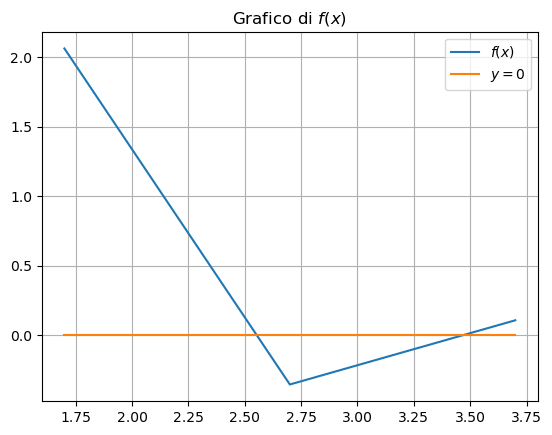

In [134]:
f = lambda x: x**4 - 13 * x**3 + 62 * x**2 - 128 * x + 96.0

start, stop = 1.7, 4.6
x_range = np.arange(start, stop)

plt.plot(x_range, f(x_range), x_range, np.zeros(x_range.shape))
plt.grid(True)
plt.title("Grafico di $f(x)$")
plt.legend(["$f(x)$", "$y = 0$"])
plt.show()

- Si implementi il metodo di Newton per la determinazione degli zeri di un'equazione non lineare [**Punti 3**]

In [122]:
def newton(f, fp, x0, maxit, tolx=np.spacing(1), tolf=np.spacing(1)):
    x_next, x_curr = None, x0
    attempts = [ x_curr ]

    while len(attempts) < maxit:
        if fp(x_curr) == 0:
            print("Derivata prima nulla!")
            return None, None
        x_next = x_curr - (f(x_curr) / fp(x_curr))
        attempts.append(x_next)
        error_x = np.abs(x_curr - x_next) / (np.abs(x_curr) if np.abs(x_curr) != 0 else 1)
        error_f = np.abs(f(x_curr))

        if error_x < tolx or error_f < tolf:
            break
        x_curr = x_next
    
    return attempts[-1], attempts

- Si implementi il metodo della regula falsi (o falsa posizione)  per la determinazione degli zeri di un'equazione non lineare [**Punti 3**]

In [131]:
import math

def sign(x):
    return math.copysign(1, x)

def regula_falsi(f, a, b, maxit, tolx=np.spacing(1), tolf=np.spacing(1)):
    
    if sign(f(a)) * sign(f(b)) > 0:
        print("Condizione del Teorema dell'esistenza degli Zeri non rispettata!")
        return None, None
    
    a_k = a
    b_k = b
    x_next, x_curr = None, a_k
    attempts = [ x_curr ]
    
    while len(attempts) < maxit:
        # Coefficiente angolare della retta che congiunge gli estremi dell'intervallo [a, b]
        m = (f(b) - f(a)) / (b - a)
        # Nuovo iterato
        x_next = x_curr - (f(x_curr) / m)
        attempts.append(x_next)
        
        error_x = np.abs(x_curr - x_next) / (np.abs(x_curr) if np.abs(x_curr) != 0 else 1)
        error_f = np.abs(f(x_curr))

        # Criterio di arresto
        if error_x < tolx or error_f < tolf:
            break

        # Avanzamento della successione degli iterati
        if sign(f(x_next)) < 0:
            a_k = x_next
        elif sign(f(x_next)) > 0:
            b_k = x_next
        x_curr = x_next
    
    return attempts[-1], attempts

- Si utilizzi il metodo di Newton per individuare tutti gli zeri  del polinomio, (scegliendo opportunamente l'iterato iniziale per il calcolo di ciascuna di esse) e calcolare l'ordine del metodo per il calcolo di ciascuno zero. Dare la definizione teorica di ordine di convergenza e giustificare i risultati alla luce della teoria. [**Punti 4**]

In [145]:
import sympy as sy

x_sym = sy.symbols('x')
# Funzione simbolica
f_sym = x_sym**4 - 13*x_sym**3 + 62*x_sym**2 - 128*x_sym + 96
# Derivata prima simbolica
fp_sym = sy.diff(f_sym, x_sym)
# Derivata prima numerica
fp = sy.lambdify(x_sym ,fp_sym, np)

# In relazione al grafico precedente si individuano i seguenti due iterati iniziali:
# (Da sinistra a destra del grafico)
x01 = 2.0
x02 = 3.25

x0s = [ x01, x02 ]
newton_results = []

def stima_ordine(xk,iterazioni):
      k=iterazioni-4
      p=np.log(abs(xk[k+2]-xk[k+3])/abs(xk[k+1]-xk[k+2]))/np.log(abs(xk[k+1]-xk[k+2])/abs(xk[k]-xk[k+1]));
     
      ordine=p
      return ordine

for x0 in x0s:
    newton_res, newton_att = newton(f, fp, x0, 200_000)
    newton_results.append(newton_res)
    print(f"Ordine di Newton per {newton_res} = {stima_ordine(newton_att, len(newton_att))}")

newton_results = np.array(newton_results, dtype=float)
print(newton_results)

ZeroDivisionError: float division by zero

- Si consideri la funzione $g(x)=f(x)/((x-x_1^*)(x-x_2^*))$ dove $x_1^*$ ed $x_2^*$ sono  gli zeri del polinomio di ascissa più piccola e più grande, rispettivamente, tra quelli calcolati al punto precedente. 
Visualizzare i grafici di g(x) e f(x) e dire se i due polinomi hanno degli zeri in comune. 
Calcolare con il metodo di Newton gli zeri di $g(x)$ [**Punti 1**]

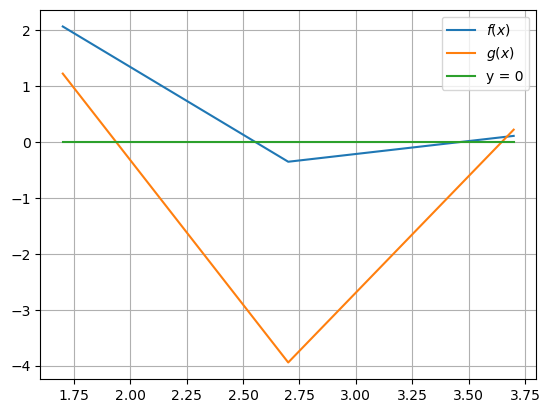

In [136]:
def g(x, x1=np.min(newton_results), x2=np.max(newton_results)):
    return f(x) / ((x - x1) * (x - x2))

plt.plot(
    x_range, f(x_range), 
    x_range, g(x_range),
    x_range, np.zeros(x_range.shape)
)
plt.grid(True)
plt.legend(["$f(x)$", "$g(x)$", "y = 0"])
plt.show()

- Si applichi il metodo della regula falsi alle funzioni $f(x)$ e $g(x)$ nell'intervallo  [1.7,4.6] e si fornisca una spiegazione teorica dei risultati ottenuti. Si indichi  un intervallo di studio opportuno affinchè con il metodo di falsa posizione sia possibile calcolare la radice con ascissa maggiore della funzione g(x) e verificare sperimentalmente che porta a soluzione  [**Punti 2**]

In [138]:
maxit = 200_000
for funct, funct_name in [ (f, "f"), (g, "g") ]:
    # Start e stop sono definiti all'inizio
    reg_res, reg_att = regula_falsi(funct, start, stop, maxit)
    print(funct_name, reg_res)

Condizione del Teorema dell'esistenza degli Zeri non rispettata!
f None
Condizione del Teorema dell'esistenza degli Zeri non rispettata!
g None


## Domande Intelligenza Artificiale
**NB: Ogni risposta esatta:  +0.5 punti, ogni risposta errata: -0.5 punti. La mancanza di risposta:  0 punti**

**1.**  Quali di queste affermazioni sono vere: 

    (a) La procedura di “annotazione” consiste nell’ottenere, per un certo dato di input, l’etichetta predetta da un dato modello 

    **X** (b)  I dati annotati sono necessari in un contesto di learning supervisionato 

    **X** (c) Non tutti gli algoritmi di Machine Learning necessitano di dati annotati 

    (d) In un problema di apprendimento automatico il cui scopo è la predizione dell’altezza di una persona, l’età è un’etichetta utile 

**2.** Quali di queste affermazioni sono vere: 

    (a)  Non esistono reti che prevedono connessioni all'indietro, ma esistono reti che prevedono biforcazioni 

    **X** (b) Al fine di apprendere relazioni complesse, le funzioni di attivazione devono essere sia derivabili che non-lineari 

    (c) L’obiettivo del processo di apprendimento dei pesi di una rete neurale è quello di minimizzare la funzione obiettivo, ovvero a minimizzare la funzione di costo. 

    **X** (d) Il Multilayer Perceptron (MLP) prevede la presenza di layer “hidden” 


**3.**  Quali di queste affermazioni sono vere: 

    **X** (a)  In una rete Multilayer Perceptron l’immagine viene appiattita e non si tiene conto della sua struttura bidimensionale 

    **X** (b)  In un layer di convoluzione, la convoluzione è applicata a un’immagine con un meccanismo di sliding window 

    (c)  In una rete Convolutional Neural Network (CNN) è ammessa la presenza esclusivamente di layer di convoluzione (sia 2D che 3D), layer di pooling ed eventualmente di normalizzazione e dropout 

    (d)  Se un’immagine di input ha 3 canali e viene passata in input a un layer di convoluzione che prevede 10 kernel, l’output di tale layer sarà un tensore di 30 canali 3- Quale delle seguenti affermazioni è vera riguardo ai layer convoluzionali in una rete CNN?


**4.**  Quali di queste affermazioni sono vere: 

Il dataset di validazione 

    **X** (a)  Può essere usato per tarare gli iperparametri del modello 

    (b)  Può essere usato per verificare una discrepanza rispetto all'accuratezza ottenuta sul training set 

    **X** (c)  La sua dimensione dovrebbe essere simile a quella del training set 

    (d)  Il suo contenuto deve essere completamente disgiunto da quello del test set 

**5.**  Quale delle seguenti affermazioni è la definizione CORRETTA di learning rate nel training di una rete neurale?

    (a) Il numero di volte in cui l'intero set di dati viene utilizzato durante il training.

    **X** (b) Un parametro che controlla la velocità con cui i pesi della rete vengono aggiornati durante il training.

    (c) Il numero di neuroni presenti nello strato di output della rete.

    (d) La funzione di attivazione utilizzata dai neuroni della rete.ressione

# Domande aperte

**6. Si descrivano le fasi di forward-propagation e back-propagation nel contesto dell'addestramento di una rete neurale**.   [punti 1.5]

[NEL FOGLIO CARTACEO]

**7. Si descriva il metodo di ottimizzazione del Gradient Descent con Momento. Nello specifico, si spieghi la motivazione alla base della sua introduzione rispetto al Gradient Descent standard, illustrando i problemi che intende risolvere. Infine, si riporti e si analizzi la formula di aggiornamento dei pesi utilizzata da questo algoritmo**[punti 3]

[NEL FOGLIO CARTACEO]